In [1]:
import scanpy as sc, pandas as pd, numpy as np
import anndata 

In [2]:
canonical_merged = sc.read_h5ad('./adata_merged.250505-canonical.h5ad')

In [4]:
canonical_merged

AnnData object with n_obs × n_vars = 123822 × 17960
    obs: 'pool', 'sample', 'background', 'treatment', 'ectoderm', 'mTeSR', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'batch', 'S_score', 'G2M_score', 'phase', 'ann', 'is_hPSC', '_scvi_batch', '_scvi_labels', 'leiden0.3', 'leiden0.5', 'leiden0.7', 'JUN', 'JUNB', 'JUND', 'FOS', 'FOSB', 'FOSL2', 'HSP90AA1', 'HSP90AB1', 'HSPA1A', 'HSPA1B', 'HSPA5', 'HSPA8', 'HSPB1', 'MT-ND1', 'MT-ND2', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB', 'SRY', 'KDM5D', 'DDX3Y', 'UTY', 'ZFY', 'KDM6A', 'MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2', 'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'HELLS', 

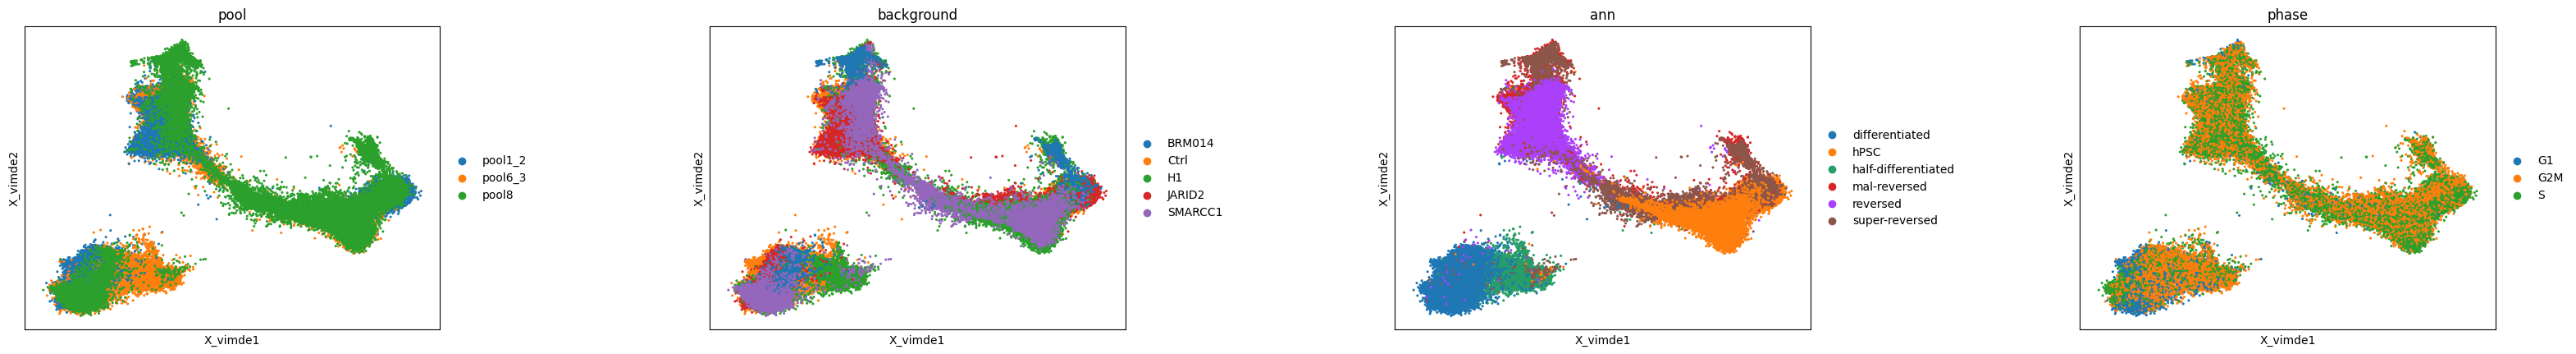

In [3]:
sc.pl.embedding(canonical_merged, basis= 'X_vimde', wspace=0.5, color=['pool','background','ann','phase'],size=20)

In [23]:
sel  = canonical_merged.obs.query("pool =='pool6_3' &"
                                  "sample =='H1-hPSC.p6' | sample =='H1-0.5E' | sample =='H1-E' | sample =='H1-ET'").index.tolist()+\
       canonical_merged.obs.query("pool =='pool8' &"
                                  "sample =='H1-E4T.1' | sample =='H1-E4T.3'").index.tolist()

In [27]:
adata_sub = canonical_merged[sel].copy()

In [28]:
sc.tl.rank_genes_groups(adata_sub, groupby='sample')

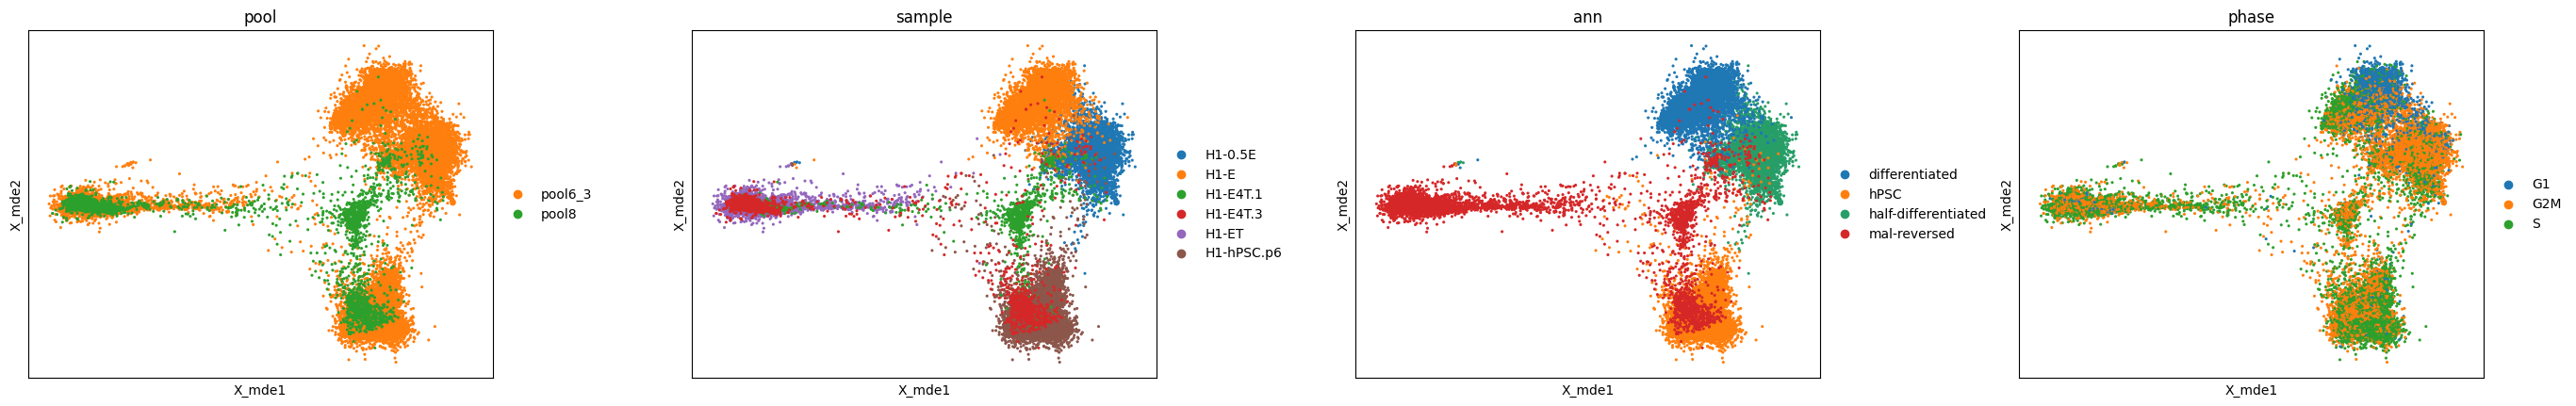

In [35]:
sc.pl.embedding(adata_sub, basis= 'X_mde', wspace=0.3, color=['pool','sample','ann','phase'],size=20)

In [44]:
sc.get.rank_genes_groups_df(adata_sub, group=None).query('pvals_adj<0.05 & logfoldchanges>1 & scores>0').group.unique()

['H1-0.5E', 'H1-E', 'H1-E4T.1', 'H1-E4T.3', 'H1-ET', 'H1-hPSC.p6']
Categories (6, object): ['H1-0.5E', 'H1-E', 'H1-E4T.1', 'H1-E4T.3', 'H1-ET', 'H1-hPSC.p6']

In [ ]:
['H1-0.5E', 'H1-E', 'H1-E4T.1', 'H1-E4T.3', 'H1-ET', 'H1-hPSC.p6']

In [89]:
group_name= 'H1-hPSC.p6'
h1_hpsc_genes = sc.get.rank_genes_groups_df(adata_sub, group=None).query('pvals_adj<0.05 & logfoldchanges>2 & scores>0').query(f"group=='{group_name}' ").sort_values('scores', ascending=False).head(15).names.tolist()

group_name= 'H1-0.5E'
h1_12hE_genes = sc.get.rank_genes_groups_df(adata_sub, group=None).query('pvals_adj<0.05 & logfoldchanges>2 & scores>0').query(f"group=='{group_name}' ").sort_values('scores', ascending=False).head(20).names.tolist()

group_name= 'H1-E'
h1_24hE_genes = sc.get.rank_genes_groups_df(adata_sub, group=None).query('pvals_adj<0.05 & logfoldchanges>2 & scores>0').query(f"group=='{group_name}' ").sort_values('scores', ascending=False).head(15).names.tolist()

group_name= 'H1-ET'
h1_24hE_24hT_genes = sc.get.rank_genes_groups_df(adata_sub, group=None).query('pvals_adj<0.05 & logfoldchanges>2 & scores>0').query(f"group=='{group_name}' ").sort_values('scores', ascending=False).head(20).names.tolist()

group_name= 'H1-E4T.1'
h1_E4T_1_genes = sc.get.rank_genes_groups_df(adata_sub, group=None).query('pvals_adj<0.05 & logfoldchanges>2 & scores>0').query(f"group=='{group_name}' ").sort_values('scores', ascending=False).head(5).names.tolist()

group_name= 'H1-E4T.3'
h1_E4T_3_genes = sc.get.rank_genes_groups_df(adata_sub, group=None).query('pvals_adj<0.05 & logfoldchanges>2 & scores>0').query(f"group=='{group_name}' ").sort_values('scores', ascending=False).head(20).names.tolist()

In [90]:
goi = h1_hpsc_genes+ h1_12hE_genes+h1_24hE_genes+ h1_24hE_24hT_genes+h1_E4T_1_genes+h1_E4T_3_genes

In [105]:
adata_sub.obs['sample'] = adata_sub.obs['sample'].cat.reorder_categories(['H1-hPSC.p6', 'H1-0.5E', 'H1-E', 'H1-ET','H1-E4T.1', 'H1-E4T.3' ], ordered=True)

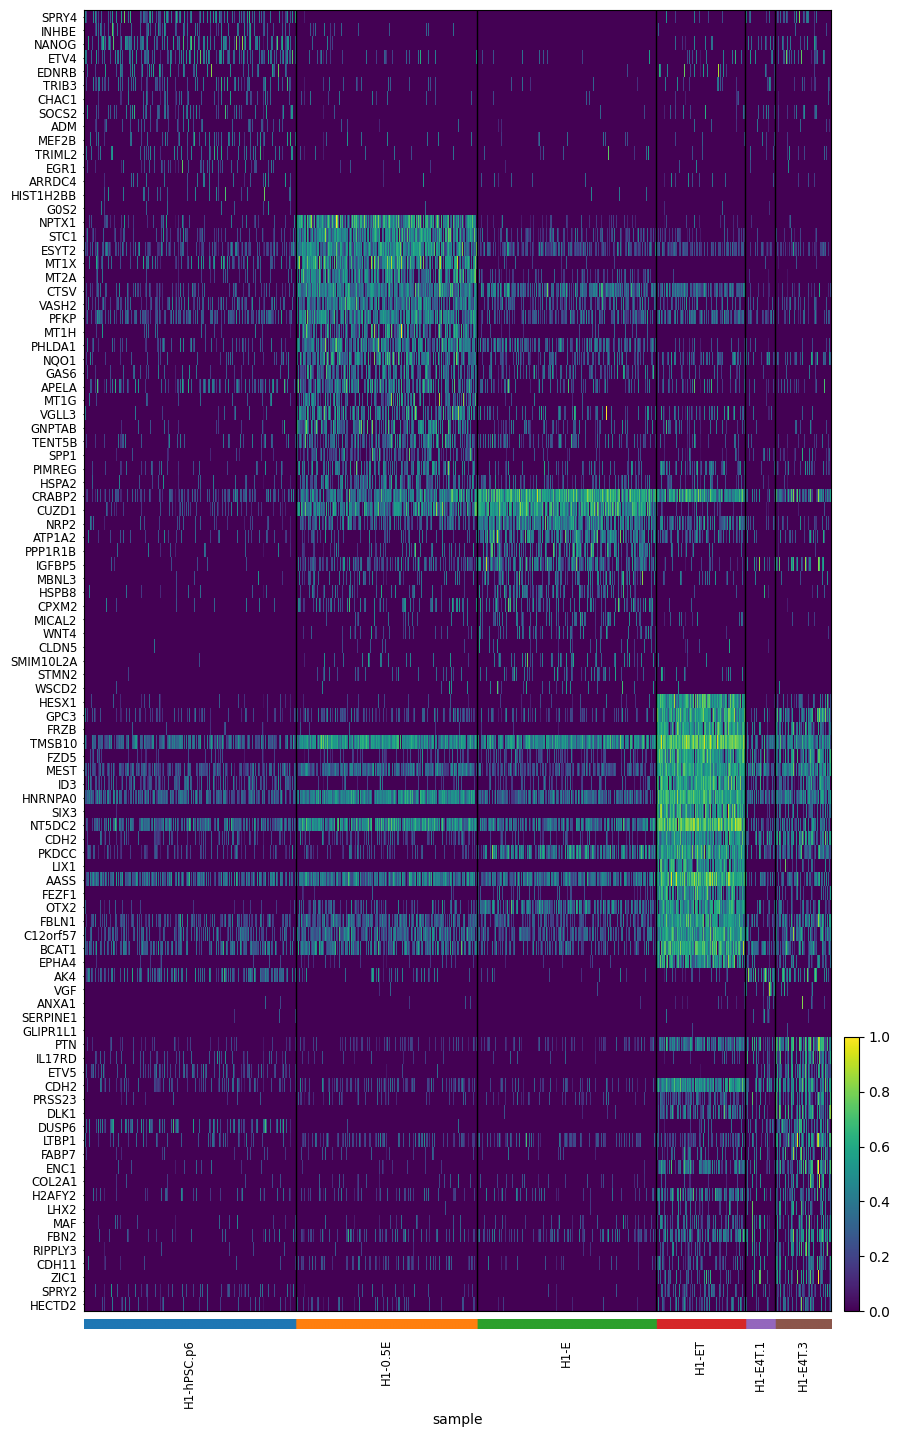

In [108]:
sc.pl.heatmap(adata_sub, groupby='sample', var_names=goi, swap_axes=True, show_gene_labels=True, dendrogram=False, standard_scale="var", save='DEG-pool68H1-samples.pdf') 

In [110]:
sc.get.rank_genes_groups_df(adata_sub, group=None).query('pvals_adj<0.05 & logfoldchanges>1 & scores>0').to_csv('DEG-pool68H1-samples.csv')